In [1]:
                                        #Capstone Project

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#aquiring and combining training and testing datasets to run certain operations
train_df = pd.read_csv('/Users/denis/Desktop/train.csv')
train_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


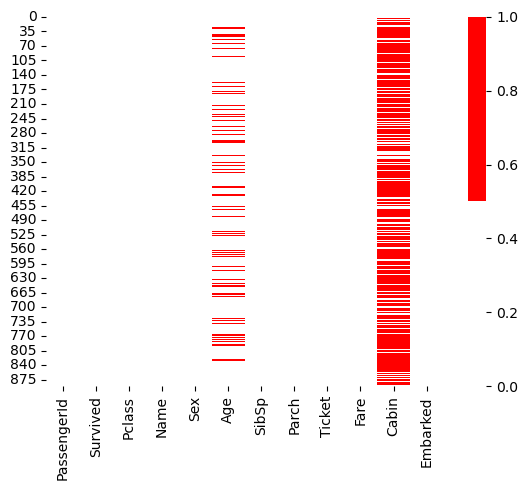

In [3]:
#analyze missing data
cols = train_df.columns[:] 
colors = ['#FFFFFF', '#FF0000']   
dia = sns.heatmap(train_df[cols].isnull(), cmap=sns.color_palette(colors))

In [4]:
#analyze missing data
for col in train_df.columns: 
    percentage_of_missing = np.mean(train_df[col].isnull())
    print(col, '\t', percentage_of_missing * 100, '%')

PassengerId 	 0.0 %
Survived 	 0.0 %
Pclass 	 0.0 %
Name 	 0.0 %
Sex 	 0.0 %
Age 	 19.865319865319865 %
SibSp 	 0.0 %
Parch 	 0.0 %
Ticket 	 0.0 %
Fare 	 0.0 %
Cabin 	 77.10437710437711 %
Embarked 	 0.22446689113355783 %


In [5]:
#generate descriptive statistics 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#summary for columns containing object (string) data
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
#aquire correlation coefficients between different variables in a dataset
train_df.corr()

/var/folders/m8/t43t75cj6qb4p4t02zjcs_1m0000gn/T/ipykernel_24431/3771089614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
#analyze our feature correlations by pivoting features against each other
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


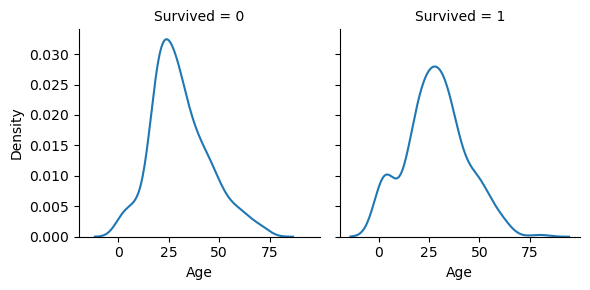

In [12]:
sns.FacetGrid(train_df, col='Survived').map(sns.kdeplot, 'Age')

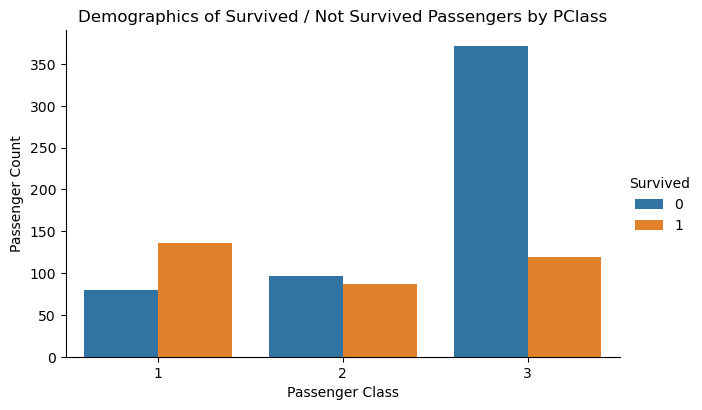

In [13]:
sns.catplot(data=train_df, x='Pclass', hue='Survived', kind='count', height=4, aspect=1.6)
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.title('Demographics of Survived / Not Survived Passengers by PClass')
plt.show()

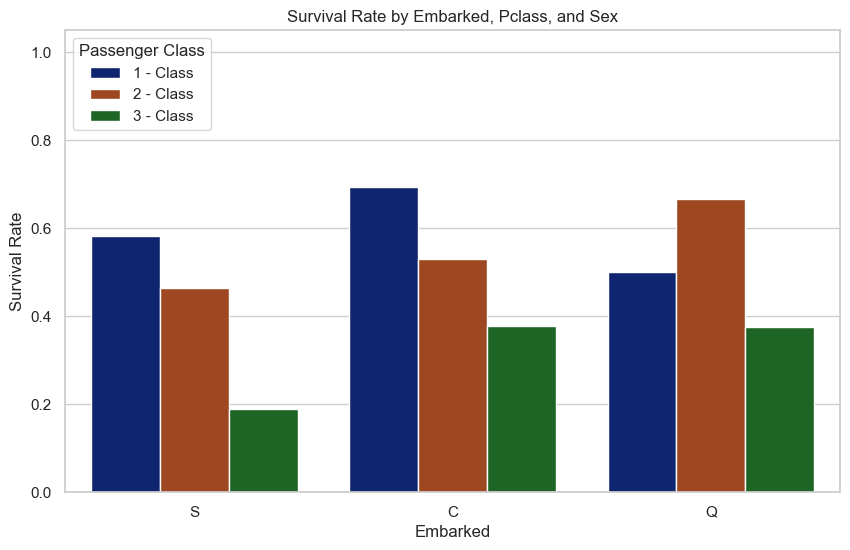

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_df, x='Embarked', y='Survived', hue='Pclass', errcolor='None', palette='dark')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked, Pclass, and Sex')

handles, labels = ax.get_legend_handles_labels()

class_labels = ['Class', 'Class', 'Class']
legend_labels = [f'{label} - {class_labels[i]}' for i, label in enumerate(labels)]

plt.legend(handles, legend_labels, title='Passenger Class', loc='upper left')
plt.show()

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# dropping Ticket, Cabin, Name, PassengerId columns since they are not useful and don't make any additional contribution to our analysis
train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)

In [17]:
#making sure the previous action was done correctly
train_df.shape

(891, 8)

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
#converting strings to numerical values for Sex column
train_df['Sex'].replace({"male": 0, "female": 1}, inplace=True)

In [20]:
#making sure the previous step was done correctly
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


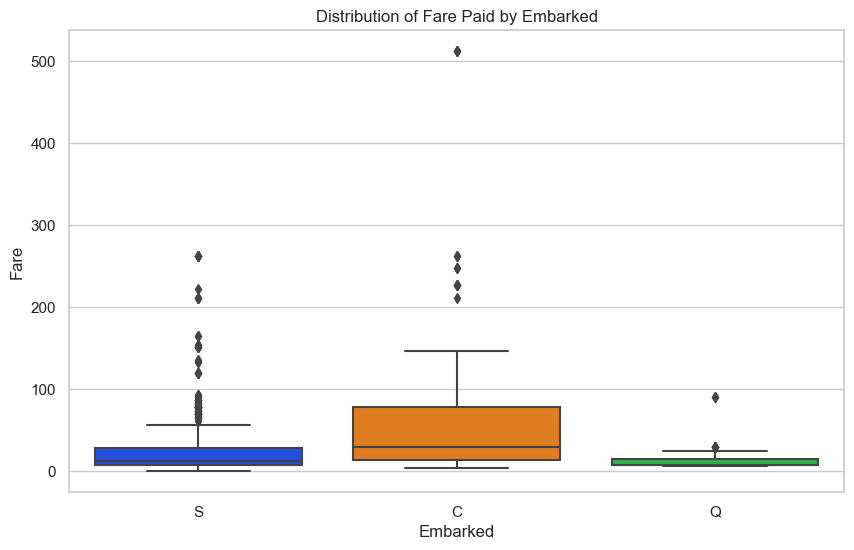

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Embarked', y='Fare', palette='bright')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.title('Distribution of Fare Paid by Embarked')
plt.show()

In [22]:
missing_age_count = train_df['Age'].isnull().sum()
print("Count of missing values in 'Age' column:", missing_age_count)

Count of missing values in 'Age' column: 177


In [23]:
missing_embarked_count = train_df['Embarked'].isnull().sum()
print("Count of missing values in 'Embarked' column:", missing_embarked_count)

Count of missing values in 'Embarked' column: 2


In [24]:
#we identify the most common used value in 'Embarked' column and replace missing value with that most common used value
most_common_embarked = train_df['Embarked'].value_counts().idxmax()
print("The most common value in the 'Embarked' column:", most_common_embarked)

The most common value in the 'Embarked' column: S


In [25]:
#replace missing values
train_df['Embarked'].fillna(most_common_embarked, inplace=True)

In [26]:
print("Count of missing values in 'Embarked' column is:", train_df['Embarked'].isnull().sum())

Count of missing values in 'Embarked' column is: 0


In [27]:
#The 'Age' column contains a lot of missing values (177), therefore, it is necessary to find the best approach to fill those missing values
age_std = train_df['Age'].std()
age_mean = train_df['Age'].mean()

print("Standard Deviation of Age:", age_std)
print("Mean of Age:", age_mean)

Standard Deviation of Age: 14.526497332334044
Mean of Age: 29.69911764705882


In [28]:
# Replace missing values in 'Age' column with 21 which is the value between the standard deviation and the mean
train_df['Age'].fillna(21, inplace=True)

In [29]:
print("Count of missing values in 'Age' column is:", train_df['Age'].isnull().sum())

Count of missing values in 'Age' column is: 0


In [30]:
#making sure we got rid of missing data
for col in train_df.columns: 
    percentage_of_missing = np.mean(train_df[col].isnull())
    print(col, '\t', percentage_of_missing * 100, '%')

Survived 	 0.0 %
Pclass 	 0.0 %
Sex 	 0.0 %
Age 	 0.0 %
SibSp 	 0.0 %
Parch 	 0.0 %
Fare 	 0.0 %
Embarked 	 0.0 %


In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [32]:
#analyzing the % of people survived who embarked from ports C, Q, and S
survival_by_embarked = train_df.groupby('Embarked')['Survived'].mean() * 100

for embarked, percentage in survival_by_embarked.items():
    print(f"Percentage of people survived from port {embarked}: {percentage:.2f}%")

Percentage of people survived from port C: 55.36%
Percentage of people survived from port Q: 38.96%
Percentage of people survived from port S: 33.90%


In [33]:
#getting rid of categorical variables and changing them to numeric values
embarked_mapping = {'Q': 1, 'S': 2, 'C': 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)

In [34]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [35]:
#transforming values in Fare column into grouped integer values in Train dataset
def map_fare_category(Fare):
    if Fare < 30:
        return 1
    elif 30 <= Fare < 100:
        return 2
    elif 100 <= Fare < 200:
        return 3
    elif 200 <= Fare < 300:
        return 4
    else:
        return 5
train_df['Fare'] = train_df['Fare'].apply(map_fare_category)

In [36]:
train_df['Fare'].value_counts()

1    651
2    187
3     33
4     17
5      3
Name: Fare, dtype: int64

In [37]:
train_df[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
4,5,1.000000
2,3,0.757576
3,4,0.647059
1,2,0.545455
0,1,0.308756


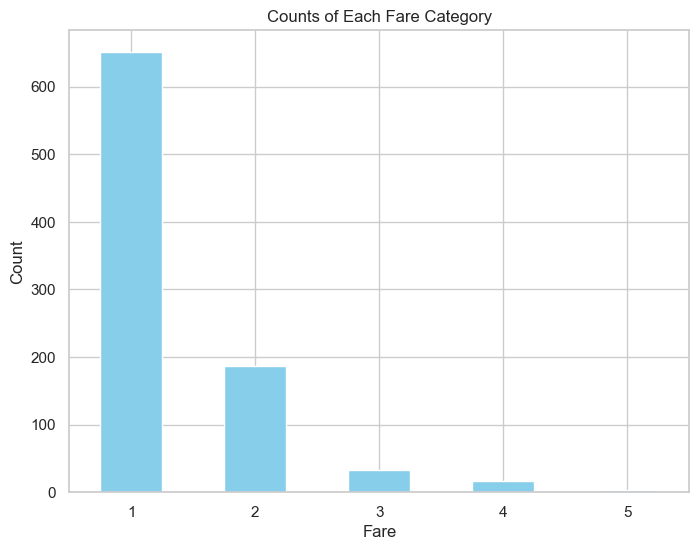

In [38]:
#creating visualization of count of each fare category
fare_category_counts = train_df['Fare'].value_counts()

plt.figure(figsize=(8, 6))
fare_category_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Counts of Each Fare Category')
plt.xticks(rotation=0)
plt.show()

In [39]:
#now we need to perform the same process for 'Age' column 
train_df['Age'].describe()

count    891.000000
mean      27.971010
std       13.457808
min        0.420000
25%       21.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
#transforming values in Age column into grouped integer values in Train dataset
def passenger_age(Age):
    if Age < 10:
        return 1
    elif 10 <= Age < 30:
        return 2
    elif 30 <= Age < 50:
        return 3
    elif 50 <= Age < 65:
        return 4
    else:
        return 5
train_df['Age'] = train_df['Age'].apply(passenger_age)

In [41]:
train_df['Age'].value_counts()

2    499
3    256
4     63
1     62
5     11
Name: Age, dtype: int64

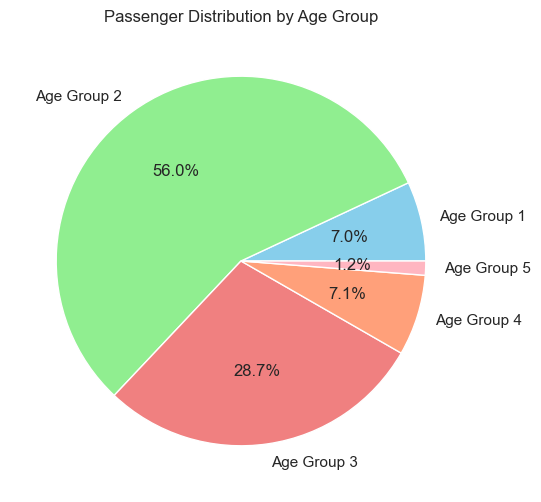

In [42]:
#creating a pie chart with Age distribution
age_counts = train_df['Age'].value_counts().sort_index()
plt.figure(figsize=(8, 6), facecolor='white')
plt.pie(age_counts, labels=[f'Age Group {age_group}' for age_group in age_counts.index], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Passenger Distribution by Age Group')
plt.show()

In [43]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2,1,0,1,2
1,1,1,1,3,1,0,2,3
2,1,3,1,2,0,0,1,2
3,1,1,1,3,1,0,2,2
4,0,3,0,3,0,0,1,2


In [44]:
#analyze missing data in Training dataset
for col in train_df.columns: 
    percentage_of_missing = np.mean(train_df[col].isnull())
    print(col, '\t', percentage_of_missing * 100, '%')

Survived 	 0.0 %
Pclass 	 0.0 %
Sex 	 0.0 %
Age 	 0.0 %
SibSp 	 0.0 %
Parch 	 0.0 %
Fare 	 0.0 %
Embarked 	 0.0 %


In [45]:
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (Y)
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)
Y_train shape: (712,)
Y_test shape: (179,)


F1 Score: 0.7552447552447553
R-squared: 0.1936936936936937
Mean Squared Error: 0.19553072625698323
Accuracy: 0.8044692737430168
Precision: 0.782608695652174


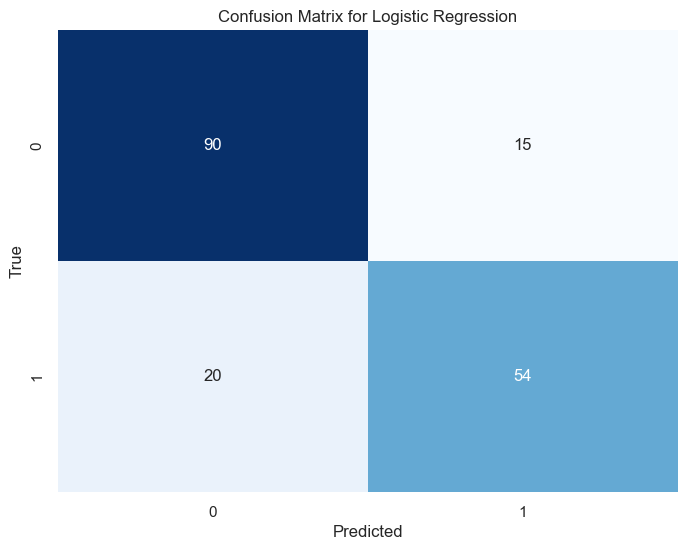

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, r2_score, mean_squared_error, accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print("F1 Score:", f1)
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy)
print("Precision:", precision)

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


R-squared: 0.10154440154440147
Mean Squared Error: 0.21787709497206703
F1 Score: 0.7272727272727273
Accuracy: 0.7821229050279329
Precision: 0.7536231884057971


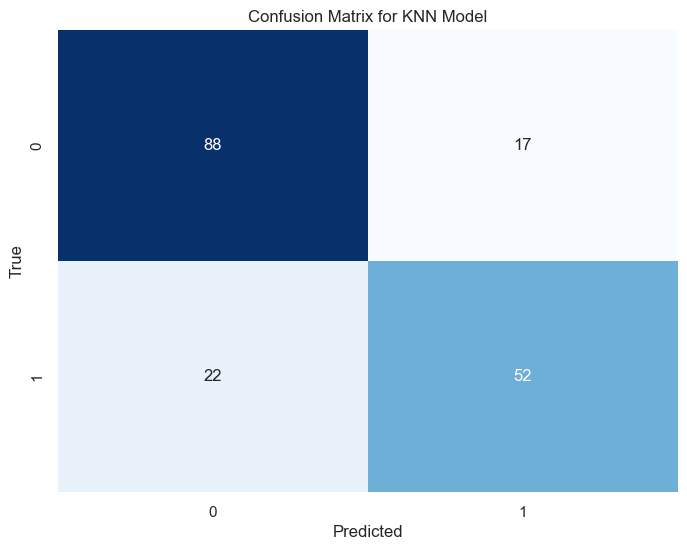

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, f1_score, confusion_matrix, accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.8044692737430168
Precision: 0.7910447761194029
Recall: 0.7162162162162162
F1 Score: 0.7517730496453902


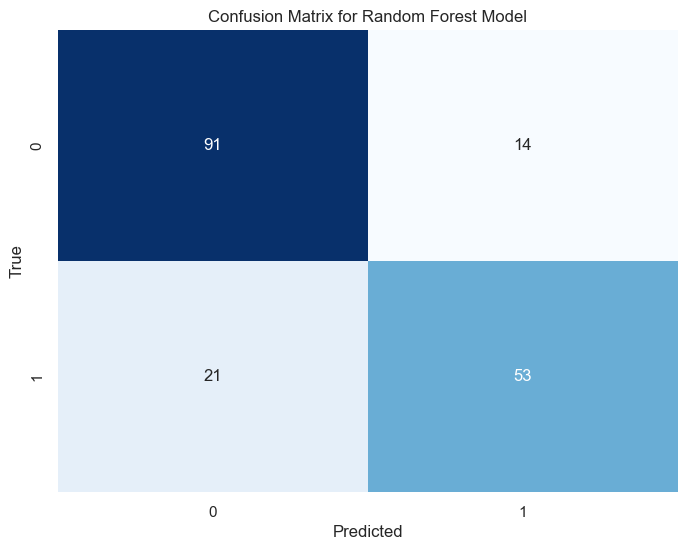

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.7988826815642458
Precision: 0.8064516129032258
F1 Score: 0.7352941176470588


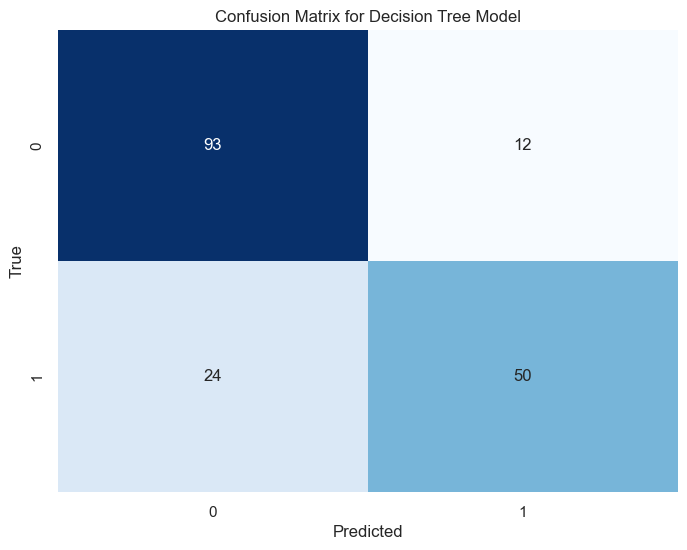

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.7821229050279329
Precision: 0.7536231884057971
F1 Score: 0.7272727272727273


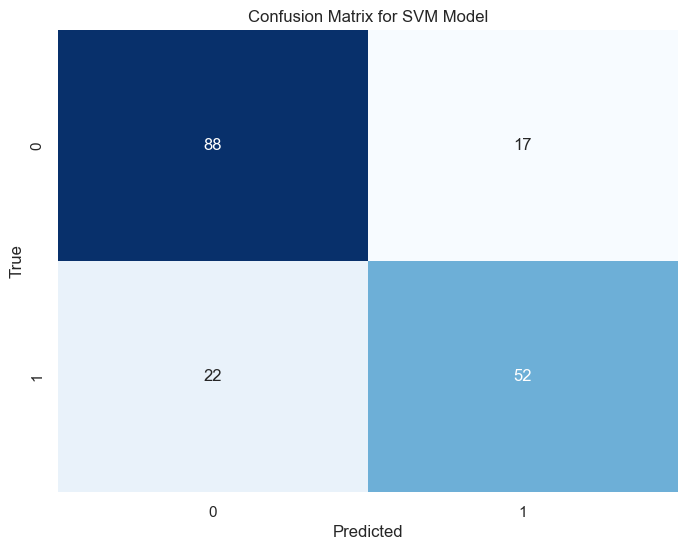

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)

Y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3)),
    ("Support Vector Machine", SVC(kernel='linear', random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42))
]

results = []

for name, model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})

results_df = pd.DataFrame(results)
print(results_df)


                    Model  Accuracy  F1 Score
0     Logistic Regression  0.804469  0.755245
1           Decision Tree  0.798883  0.735294
2     K-Nearest Neighbors  0.782123  0.727273
3  Support Vector Machine  0.782123  0.727273
4           Random Forest  0.804469  0.751773
